<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from seaborn import kdeplot

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Рассмотрим данные

In [3]:
print(train.info())
display(train.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
249,2016-01-27 01:00:00,5.695072,10.874554,7.472660,45.297058,69.243334,11.434546,2.097967,17.464952,3.124930,...,14.994810,-550.789404,13.026961,-550.039211,10.005100,-600.245761,7.987370,-599.418943,11.942529,-599.097570
3558,2016-07-13 09:59:59,6.326910,10.945428,16.072064,42.008668,52.286761,8.509839,1.939656,11.365951,3.145759,...,14.947909,-399.543455,4.981157,-399.013350,9.935251,-301.357915,4.911127,-399.687719,24.984794,-451.229856
9758,2017-08-31 12:59:59,3.005500,11.814406,9.671744,46.382427,62.716335,6.110957,4.151190,13.774416,2.975744,...,13.978298,-501.451245,10.972512,-399.923073,13.983377,-501.369821,11.040378,-500.256530,14.994855,-500.968324
1889,2016-04-18 21:00:00,4.759732,10.376865,8.927999,46.487279,65.398220,8.163433,2.279054,12.239511,2.872482,...,13.996845,-499.953800,11.951851,-499.808658,12.977468,-499.474281,11.054713,-499.977419,19.988930,-500.059422
4375,2016-08-18 12:59:59,5.846858,9.443849,11.988641,44.984467,69.350046,10.652106,2.963806,11.225636,4.064642,...,18.023594,-399.922632,10.072223,-399.929963,14.998444,-398.242797,4.961322,-400.109599,19.978994,-500.114453


In [4]:
print(test.info())
display(test.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
1915,2016-12-01 14:59:59,219.904328,8.524649,7.10,1.496001,1498.985509,-499.921891,1501.987914,-499.440550,1503.272231,...,18.043935,-500.837653,15.975826,-500.266636,15.415065,-500.323686,12.028234,-500.096181,22.000581,-499.867008
5123,2017-12-23 17:59:59,226.122776,14.978960,7.60,1.283607,1599.075139,-400.273562,1601.174348,-407.524491,1377.807878,...,20.023738,-498.714066,15.064413,-499.716469,10.981089,-499.400692,7.941606,-500.056006,11.982941,-499.121686
4090,2017-11-08 21:59:59,242.190285,10.976608,7.93,1.706002,1600.761153,-500.565031,1601.026048,-507.066381,1486.948822,...,20.995834,-500.163855,18.937432,-502.798845,14.940412,-501.945285,9.572934,-499.884659,15.999222,-500.771418
162,2016-09-07 23:59:59,134.173942,7.996379,7.87,0.501864,1295.452943,-499.683259,1299.142031,-499.884498,1302.667131,...,8.004832,-500.165776,4.919914,-601.170383,7.894918,-600.317470,3.033896,-599.666283,20.026784,-599.903514
2755,2017-09-10 15:59:59,150.184820,5.020122,6.71,1.043625,1301.949870,-499.617367,1300.475399,-499.362875,1299.671728,...,12.673214,-505.421181,9.771336,-408.505423,12.683196,-499.504193,10.011462,-499.995963,13.633606,-499.490636


В тестовой выборке нет output и calculation, т.е. никаких данных о рассчетах и характеристиках процесса 

In [5]:
print(full.info())
display(full.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
6946,2016-12-16 09:59:59,5.506764,8.952837,12.740754,44.789519,71.061853,12.344760,3.444166,7.204628,3.746639,...,16.987622,-500.233625,14.914701,-504.704268,17.046296,-500.403374,11.989519,-499.697806,20.973426,-500.260253
16835,2018-04-12 13:59:59,4.660003,8.162267,8.906735,47.875348,82.968368,12.768926,2.488483,6.466985,1.836589,...,23.005904,-502.604162,15.964322,-500.117601,18.046667,-501.373563,12.035478,-500.146844,12.981964,-500.676309
5986,2016-11-04 22:59:59,3.712091,10.406476,10.469988,46.465418,69.085302,7.841450,2.709056,10.944302,2.895283,...,14.993114,-501.456348,13.061716,-500.461075,17.375873,-499.913069,13.992913,-499.828767,21.976553,-500.832722
4061,2016-08-03 22:59:59,4.280660,10.898610,7.846398,44.105842,58.966012,7.727834,2.446389,7.133148,3.101218,...,19.956965,-400.135147,10.025701,-399.975433,9.839160,-400.782742,4.950314,-400.262082,22.993549,-499.918578
1012,2016-02-29 14:00:00,4.217395,10.214484,11.060427,46.095665,75.549211,10.786032,0.501195,10.407575,2.037250,...,14.047722,-499.411497,13.905822,-500.009480,12.031596,-501.021241,10.034108,-499.347813,20.012875,-502.999098


Проверим данные на явные дупликаты

In [6]:
print(test.duplicated().sum())
print(train.duplicated().sum())
print(full.duplicated().sum())

0
0
0


Вычислим количество пропусков

In [7]:
print(test.isna().sum().sum())
print(train.isna().sum().sum())
print(full.isna().sum().sum())

90
4100
4481


удалим пропуски

In [8]:
test = test.interpolate()
train = train.interpolate()
full = full.interpolate()

Проверим правильность рассчета эффективности обогащения

In [9]:
c = train['rougher.output.concentrate_au']
f = train['rougher.input.feed_au']
t = train['rougher.output.tail_au']

In [10]:
rec = (c*(f-t))/(f*(c-t))*100

In [11]:
print(train['rougher.output.recovery'].mean())
print(rec.mean())

82.70450164550293
82.70450164550293


In [12]:
mean_absolute_error(train['rougher.output.recovery'],rec)

9.73512347450521e-15

Ошибка пренебрежимо мала, значения рассчитанны точно

## Анализ данных

Рассмотрм концентрации на всех этапов

<AxesSubplot:>

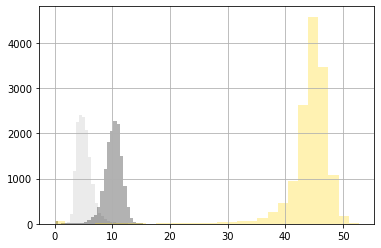

In [13]:
#final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_au 

train['final.output.concentrate_ag'].hist(alpha=0.3,bins=30,color='silver')
train['final.output.concentrate_pb'].hist(alpha=0.3,bins=30,color='black')
train['final.output.concentrate_au'].hist(alpha=0.3,bins=30,color='gold')

<AxesSubplot:>

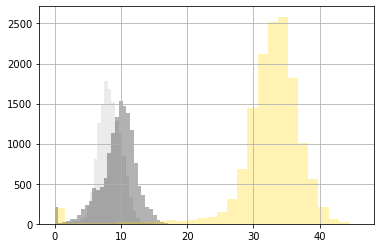

In [14]:
train['primary_cleaner.output.concentrate_ag'].hist(alpha=0.3,bins=30,color='silver')
train['primary_cleaner.output.concentrate_pb'].hist(alpha=0.3,bins=30,color='black')
train['primary_cleaner.output.concentrate_au'].hist(alpha=0.3,bins=30,color='gold')

<AxesSubplot:>

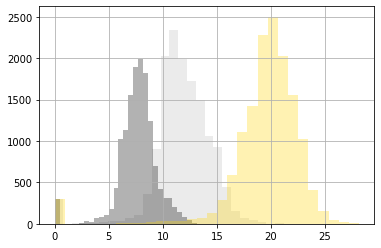

In [15]:
train['rougher.output.concentrate_ag'].hist(alpha=0.3,bins=30,color='silver')
train['rougher.output.concentrate_pb'].hist(alpha=0.3,bins=30,color='black')
train['rougher.output.concentrate_au'].hist(alpha=0.3,bins=30,color='gold')

<AxesSubplot:>

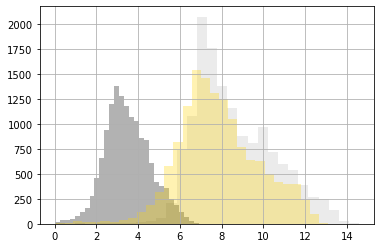

In [16]:
train['rougher.input.feed_ag'].hist(alpha=0.3,bins=30,color='silver')
train['rougher.input.feed_pb'].hist(alpha=0.3,bins=30,color='black')
train['rougher.input.feed_au'].hist(alpha=0.3,bins=30,color='gold')

Видно что с каждым этапом концентрация золота увеличивается

Рассмотрим расспределение размера гранул 

<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

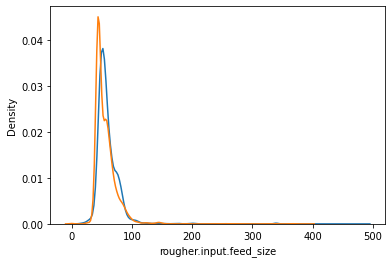

In [17]:
kdeplot(train['rougher.input.feed_size'])
kdeplot(test['rougher.input.feed_size'])

<AxesSubplot:xlabel='primary_cleaner.input.feed_size', ylabel='Density'>

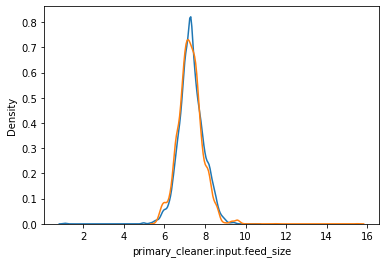

In [18]:
kdeplot(train['primary_cleaner.input.feed_size'])
kdeplot(test['primary_cleaner.input.feed_size'])

Распределения схожи

In [19]:
train = train.drop(train[(train['rougher.input.feed_sol']+train['rougher.input.feed_au']+train['rougher.input.feed_pb']+train['rougher.input.feed_ag'])==0].index)
train = train.drop(train[(train['rougher.output.concentrate_sol']+train['rougher.output.concentrate_ag'] +train['rougher.output.concentrate_au']+train['rougher.output.concentrate_pb'])==0].index)
train = train.drop(train[(train['primary_cleaner.output.concentrate_sol']+train['primary_cleaner.output.concentrate_ag'] +train['primary_cleaner.output.concentrate_au']+train['primary_cleaner.output.concentrate_pb'])==0].index)
train = train.drop(train[(train['final.output.concentrate_sol']+train['final.output.concentrate_ag']+ train['final.output.concentrate_au']+train['final.output.concentrate_pb'])==0].index)

In [20]:
#rougher.input
#rougher.output
#primary_cleaner.output
#final.output

r_in = train['rougher.input.feed_sol']+train['rougher.input.feed_au']+train['rougher.input.feed_pb']+train['rougher.input.feed_ag']

In [21]:
r_out = train['rougher.output.concentrate_sol']+train['rougher.output.concentrate_ag']+train['rougher.output.concentrate_au']+train['rougher.output.concentrate_pb']

In [22]:
prime_out = train['primary_cleaner.output.concentrate_sol']+train['primary_cleaner.output.concentrate_ag']+train['primary_cleaner.output.concentrate_au']+train['primary_cleaner.output.concentrate_pb']

In [23]:
f_out = train['final.output.concentrate_sol']+train['final.output.concentrate_ag']+train['final.output.concentrate_au']+train['final.output.concentrate_pb']

<AxesSubplot:>

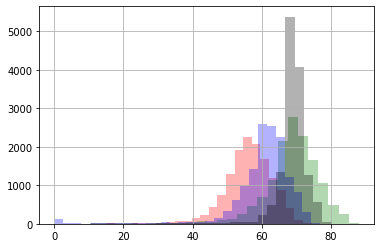

In [24]:
r_in.hist(bins=30,alpha=0.3,color='red')
r_out.hist(bins=30,alpha=0.3,color='green')
prime_out.hist(bins=30,alpha=0.3, color='blue')
f_out.hist(bins=30,alpha=0.3,color='black')

Суммарная концентрация на всех этапах увеличивается но пренебрежимо мало

ПОдготовим данные для сегмента 4

In [25]:
train_use = train[np.hstack((test.columns.values,['rougher.output.recovery','final.output.recovery'])) ]
test_use = test.drop(['date'],axis=1)

## Модель

Введем функцию sMAPE

In [26]:
def sMAPE(true, predict):
    return 100/len(true)*np.sum(2*np.abs(true-predict)/(np.abs(true)+np.abs(predict)))

In [27]:
def total_sMAPE(smape_r,smape_f):
    return 0.25*smape_r+0.75*smape_f

Рассмотрим RandomForestRegressor

In [28]:
model = RandomForestRegressor()
param_grid = {'max_depth':[2,4,8],'n_estimators':[50,100,150]}

Выделим features и targets

In [29]:
train_use_feat = train_use.drop(['date','final.output.recovery','rougher.output.recovery'],axis=1)
train_use_targ = train_use['final.output.recovery']

In [30]:
smape_score = make_scorer(sMAPE,greater_is_better = False)
grid = GridSearchCV(model, param_grid, scoring = smape_score,cv=4,n_jobs=-1)

Найдем наилучшие параметры

In [31]:
grid.fit(train_use_feat,train_use_targ)
print(grid.best_params_)
smap_r = grid.best_score_
print(smap_r)

{'max_depth': 2, 'n_estimators': 100}
-9.63863370201194


In [32]:
train_use_targ = train_use['rougher.output.recovery']
grid.fit(train_use_feat,train_use_targ)
print(grid.best_params_)
smap_f = grid.best_score_
print(smap_f)

{'max_depth': 8, 'n_estimators': 50}
-7.716564033336443


Посчитаем конечную sMAPE

In [33]:
print(total_sMAPE(-smap_r,-smap_f))

8.197081450505317


Теперь для сравнения рассмотрим LinearRegression

In [34]:
model_sec = LinearRegression()
train_use_targ_f = train_use['final.output.recovery']
train_use_targ_r = train_use['rougher.output.recovery']

In [35]:
score = cross_val_score(model,train_use_feat,train_use_targ_f, cv=5, scoring =smape_score)
smap_f_2 = -score.mean()
print( smap_f_2 )

9.783174910161454


In [36]:
score = cross_val_score(model,train_use_feat,train_use_targ_r, cv=5, scoring =smape_score)
smap_r_2 = -score.mean()
print( smap_r_2 )

7.295733597330845


In [37]:
print(total_sMAPE(smap_r_2,smap_f_2))

9.161314581953802


Видно что итоговая ошибка стала больше поэтому в итоге будем использовать лес 

In [38]:
model = RandomForestRegressor( max_depth = 2, n_estimators = 150)
model.fit(train_use_feat,train_use_targ_r)
predict_r = model.predict(test_use)

In [39]:
model = RandomForestRegressor( max_depth = 4, n_estimators = 150)
model.fit(train_use_feat,train_use_targ_f)
predict_f = model.predict(test_use)

In [40]:
true = test.merge(full[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         how = 'inner', on= 'date')
true_r = true['rougher.output.recovery']
true_f = true['final.output.recovery']

In [41]:
final_f = sMAPE(true_f,predict_f)
final_r = sMAPE(true_r,predict_r)

Получим финальную ошибку

In [42]:
print(total_sMAPE(final_r,final_f))

9.482975143876851


In [43]:
model_comp = DummyRegressor()
model_comp.fit(train_use_feat,train_use_targ_f)
predict_comp_f = model.predict(test_use)
model_comp.fit(train_use_feat,train_use_targ_r)
predict_comp_r = model.predict(test_use)

final_comp_f = sMAPE(true_f,predict_comp_f)
final_comp_r = sMAPE(true_r,predict_comp_r)

print(total_sMAPE(final_comp_r,final_comp_f))

14.447328240609433


RandomForest оказался лучше чем DummyRegressor

# Вывод

В данном проекте был изучен процесс фильтрации золота, но основе анализа данных мы подтвердили пригодность использования моделей, эффективность моделей была оцененна с помощью параметра sMAPE.